In [125]:
import tensorflow as tf
import numpy as np


C:\Users\Lenovo\anaconda3\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lenovo\anaconda3\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lenovo\anaconda3\envs\tfdeeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lenovo\anaconda3\envs\tfdeeplearni

In [126]:
hello= tf.constant("hello world")

In [127]:
sess = tf.Session()

In [128]:
print(sess.run(hello))

b'hello world'


# operation

In [129]:
class Operation():
    
    def __init__(self,input_nodes = []):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
    
    def compute(self):
        pass

In [148]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var + y_var

In [165]:
class multiply(Operation):
    
    def __init__(self,a,b):
        super().__init__([a,b])
        
    def compute(self,a_var,b_var):
        self.inputs = [a_var , b_var]
        return a_var * b_var

In [166]:
class matmul(Operation):
    
    def __init__(self,a,b):
        super().__init__([a,b])
        
    def compute(self,a_var,b_var):
        self.inputs = [a_var,b_var]
        return a_var.dot(b_var)

In [167]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [168]:
class Variable():
    
    def __init__(self,initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)

In [169]:
class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.variables = []
        self.placeholders = []
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph = self

z = Ax + b

A = 10

b = 1

Z = Ax + b

In [170]:
g = Graph()

In [171]:
g.set_as_default()

In [172]:
A = Variable(10)

In [173]:
b = Variable(1)

In [174]:
x = Placeholder()

In [175]:
y = multiply(A,x)

In [176]:
z = add(y,b)

## Transversing Operation nodes

In [177]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [178]:
class Session():
    
    def run(self,operation,feed_dict= {}):
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node)== Placeholder:
                
                node.output = feed_dict[node]
            
            elif type(node)== Variable:
                node.output = node.value
                
            else:
                
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs)
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output
                

In [179]:
sess = Session()

In [181]:
result =sess.run(operation = z, feed_dict={x:10})

In [182]:
result

101

In [185]:
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2])

x = Placeholder()

y = matmul(A,x)

z= add(y ,b)

In [186]:
sess = Session()

sess.run(operation=z, feed_dict={x:10})

array([[101, 202],
       [301, 402]])

# Classifiction Problem

## Activation Function

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [191]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

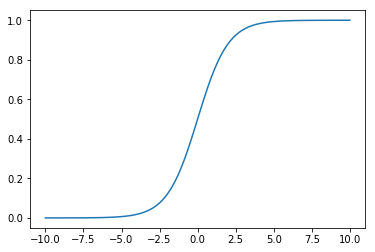

In [192]:
plt.plot(sample_z,sample_a)

In [196]:
class Sigmoid(Operation):
    
    def __init__(self,z):
        
        super.__init__([z])
    
    def compute(self,z_val):
        return 1/(1 + np.exp(-z_val))

ImportError: No module named 'numpy.testing.nosetester'